In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [ ]:
df = pd.read_csv('turnover.csv', engine='python', encoding='latin1')
df.head(5)

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


In [ ]:
print(df['traffic'].unique())

['rabrecNErab' 'empjs' 'youjs' 'referal' 'advert' 'KA' 'recNErab'
 'friends']


In [ ]:
print(df['industry'].unique())

['Banks' 'PowerGeneration' 'Retail' 'manufacture' 'Consult' 'State' 'etc'
 'Building' 'IT' ' HoReCa' 'Telecom' 'Pharma' 'Mining' 'transport'
 'Agriculture' 'RealEstate']


In [ ]:
print(df['profession'].unique())

['HR' 'Commercial' 'Marketing' 'etc' 'Sales' 'BusinessDevelopment'
 'Finanñe' 'Teaching' 'manage' 'IT' 'Law' 'Consult' 'Engineer' 'PR'
 'Accounting']


In [ ]:
#process_df = df.loc[(df['industry'] == 'IT') & (df['profession'] == 'IT')]
#process_df.head(5)

In [ ]:
process_df = df.drop(['stag', 'coach', 'greywage', 'extraversion', 'independ', 'selfcontrol', 'anxiety', 'novator'], axis=1)
process_df.head(5)

,event,gender,age,industry,profession,traffic,head_gender,way
0,1,m,35.0,Banks,HR,rabrecNErab,f,bus
1,1,m,33.0,Banks,HR,empjs,m,bus
2,1,f,35.0,PowerGeneration,HR,rabrecNErab,m,bus
3,1,f,35.0,PowerGeneration,HR,rabrecNErab,m,bus
4,1,m,32.0,Retail,Commercial,youjs,f,bus


In [ ]:
X_employees = process_df.iloc[:, 1:7].values

In [ ]:
X_employees[0]

array(['m', 35.0, 'Banks', 'HR', 'rabrecNErab', 'f'], dtype=object)

In [ ]:
y_employees = process_df.iloc[:, 0].values

In [ ]:
y_employees[0]

1

In [ ]:
onehotencoder_employees = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0, 2, 3, 4, 5])], remainder='passthrough')

In [ ]:
print(onehotencoder_employees)

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHot', OneHotEncoder(), [0, 2, 3, 4, 5])])


In [ ]:
X_employees = onehotencoder_employees.fit_transform(X_employees).toarray()

In [ ]:
X_employees[0]

array([ 0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  1.,  0., 35.])

In [ ]:
scaler_employees = StandardScaler()
X_employees = scaler_employees.fit_transform(X_employees)

In [ ]:
X_employees[0]

array([-1.75800447,  1.75800447, -0.09919172, -0.11603875,  2.98387479,
       -0.19412322, -0.26484369, -0.34806887, -0.14737523, -0.13429172,
       -0.18662913, -0.10792935, -0.58655573, -0.22629721, -0.18148518,
       -0.30136565, -0.38387201, -0.18662913, -0.09453333, -0.15652766,
       -0.144207  , -0.15048232, -0.11603875, -0.12364372,  0.7010089 ,
       -0.26484369, -0.07898645, -0.16802723, -0.07309468, -0.2491755 ,
       -0.10364874, -0.18407277, -0.14097352, -0.25117427, -0.17352086,
       -0.53056413, -0.34163741,  2.08583578, -0.18915554, -0.30311089,
       -0.62618568,  1.03516165, -1.03516165,  0.56242076])

In [ ]:
X_employees_training, X_employees_test, y_employees_training, y_employees_test = train_test_split(X_employees, y_employees, test_size=0.25, random_state=0 )

In [ ]:
X_employees_training.shape, y_employees_training.shape

((846, 44), (846,))

In [ ]:
X_employees_test.shape, y_employees_test.shape

((283, 44), (283,))

In [ ]:
employees_tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
employees_tree.fit(X_employees_training, y_employees_training)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
X_employees_test[0]

array([ 0.56882677, -0.56882677, -0.09919172, -0.11603875, -0.33513471,
       -0.19412322, -0.26484369, -0.34806887, -0.14737523, -0.13429172,
        5.35822044, -0.10792935, -0.58655573, -0.22629721, -0.18148518,
       -0.30136565, -0.38387201, -0.18662913, -0.09453333, -0.15652766,
       -0.144207  , -0.15048232, -0.11603875, -0.12364372,  0.7010089 ,
       -0.26484369, -0.07898645, -0.16802723, -0.07309468, -0.2491755 ,
       -0.10364874, -0.18407277, -0.14097352, -0.25117427, -0.17352086,
        1.88478629, -0.34163741, -0.47942413, -0.18915554, -0.30311089,
       -0.62618568,  1.03516165, -1.03516165,  0.27642244])

In [ ]:
predicts = employees_tree.predict(X_employees_test)
predicts

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1])

In [ ]:
accuracy_score(y_employees_test, predicts)

0.6996466431095406

In [ ]:
print(classification_report(y_employees_test, predicts))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       149
           1       0.66      0.76      0.71       134

    accuracy                           0.70       283
   macro avg       0.70      0.70      0.70       283
weighted avg       0.71      0.70      0.70       283



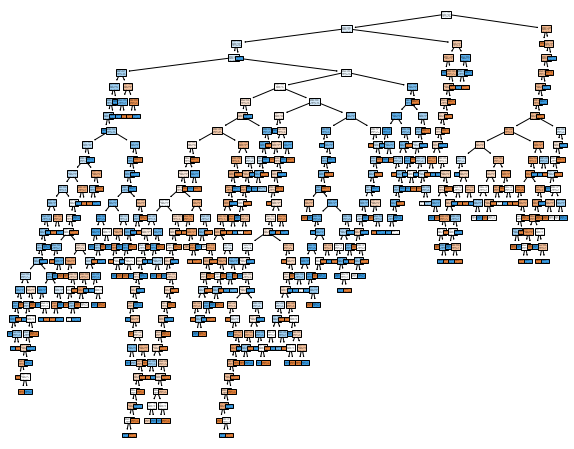

In [ ]:
plt.figure(figsize=(10, 8))
tree.plot_tree(employees_tree, filled=True);